attached# **sars-cov-2 diary** 
### **Date**: 01-04-2021

## **Project**: Genomic Surveillance of Sars-CoV-2 in Kenya
### **PI**: Dr. Samuel Oyola, Senoir Scientist - Genomics

## Introduction
This project will track the evolution of the Sars-CoV-2 within the country. Full virus genomes will be sequenced using both Illumina and Nanopore technologies to, primarily, determine variations (Variant Calling). The data will be inferred against the available metadata to decipher intriguing insights on the virus epidemiology. This notebook will be used to document virtually all my interactions with this project.

My role: Research Associate - Bioiformatics
Job description:
 - Receive-log samples
 - Library preparation
 - Sequencing - MiSeq | NextSeq | Nanopore
 - Sequence data analyses
   - Develop pipeline scripts
   - Generate visualisations of results
   - Prepare summary reports
 - Literature reviews
 - Manuscript preparation

## Seq Data Workflow

### Sequencing information 
 - Batch no.: A001
 - Platform: Illumina MiSeq
 - Library preparion: NEBNext
 - Seq Date: 01-04-2021
 - Number of samples:30

### Sequencing analyses
Raw sequence reads were duplicated to a working copy. Files were renamed using the code snippet below (`rename.sh`):
```bash
#!/usr/bin/env bash

rmsuff1=_L001_R1_001.fastq.gz
rmsuff2=$(sed 's/R1/R2/' <<< ${rmsuff1})
suff1=_1.fastq.gz
suff2=$(sed 's/1/2/' <<< ${suff1})

count=`ls -1 *${rmsuff1} | wc -l`

if [ $count != 0 ];
then
for rd1 in *${rmsuff1}
do
    base=$(basename ${rd1} ${rmsuff1})
    mv ${rd1} ${base}${suff1}
    mv ${base}${rmsuff2} ${base}${suff2}
done
else
    echo "There is no file with ${rmsuff1} suffix in the directory"
fi
```

# Depth plots across kits

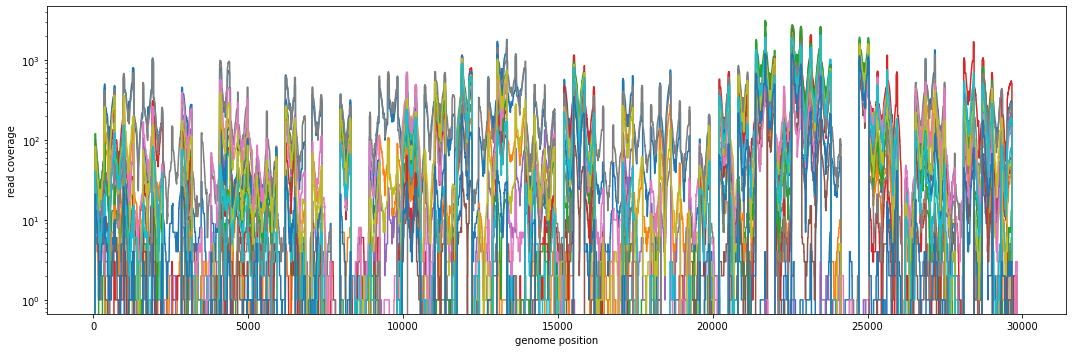

In [5]:
import pandas as pd, os, matplotlib.pyplot as plt
base_dir = '/home/ouso/depth_files_post' #/dph_across_kits.ipynb
#fig = plt.figure(figsize=(15, 5))
fig, ax = plt.subplots(figsize=(15, 5))
for file in os.listdir(f'{base_dir}/high_kit/'):
    #print(file)
    df = pd.read_table(f'{base_dir}/high_kit/{file}', sep='\t', names=['ref', 'pos', 'no_reads' ])
    label = file.split('_')[1]
    df['no_reads'].plot(logy=True, ax=ax, label=label)
    plt.xlabel('genome position')
    plt.ylabel('read coverage')
    #plt.legend()
plt.tight_layout()
plt.show()


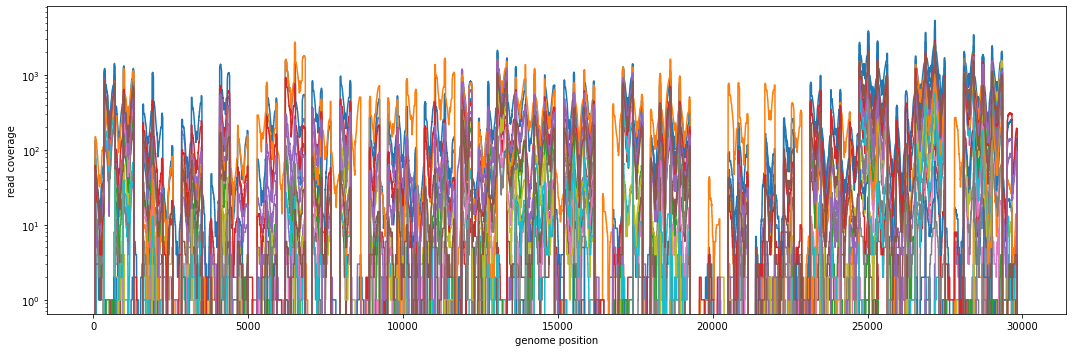

In [6]:
import pandas as pd, os, matplotlib.pyplot as plt
#fig = plt.figure(figsize=(15, 5))
fig, ax = plt.subplots(figsize=(15, 5))
base_dir = '/home/ouso/depth_files_post/super_kit/'
for file in os.listdir(base_dir):
    #print(file)
    df = pd.read_table(f'{base_dir}{file}', sep='\t', names=['ref', 'pos', 'no_reads' ])
    label = file.split('_')[1]
    df['no_reads'].plot(logy=True, ax=ax, label=label)
    plt.xlabel('genome position')
    plt.ylabel('read coverage')
    #plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
fig = plt.figure(figsize=(15, 5))

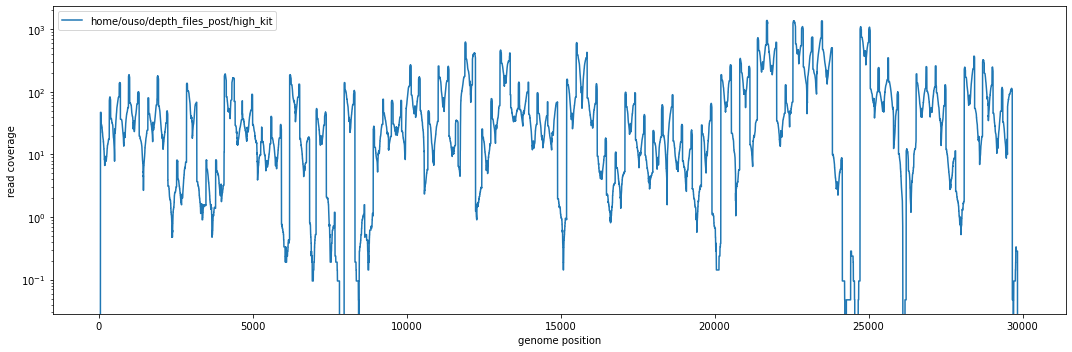

In [7]:
import pandas as pd, os, matplotlib.pyplot as plt
#fig = plt.figure(figsize=(15, 5))
fig, ax = plt.subplots(figsize=(15, 5))
rep = '/home/ouso/depth_files_post/high_kit/' 
count = 0
reads_series = 0
for file in os.listdir(rep):
    count += 1
    df = pd.read_table(f'{rep}{file}', sep='\t', names=['ref', 'pos', 'no_reads' ])
    label = rep.lstrip('./').rstrip('/')
    reads_series += df['no_reads']
reads_series_avg = reads_series / count    
reads_series_avg.plot(logy=True, ax=ax, label=label)
plt.xlabel('genome position')
plt.ylabel('read coverage')
plt.legend()
plt.tight_layout()
plt.show()

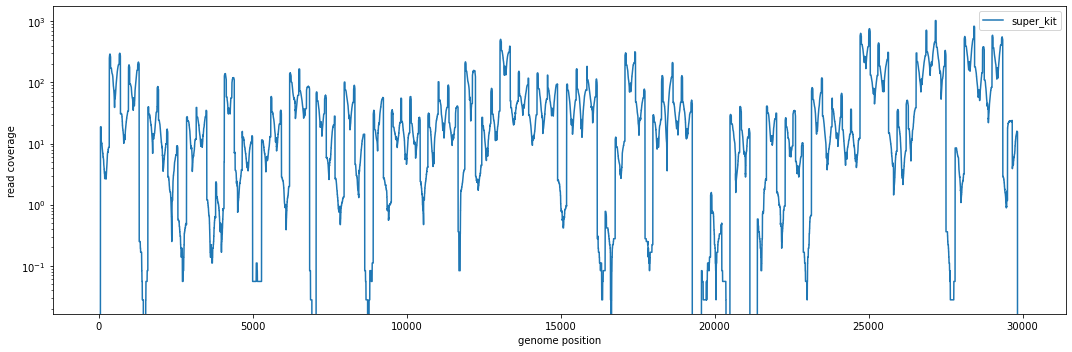

In [19]:
import pandas as pd, os, matplotlib.pyplot as plt
#fig = plt.figure(figsize=(15, 5))
fig, ax = plt.subplots(figsize=(15, 5))
rep = '/home/ouso/depth_files_post/super_kit/' 
count = 0
reads_series = 0
for file in os.listdir(rep):
    count += 1
    df = pd.read_table(f'{rep}{file}', sep='\t', names=['ref', 'pos', 'no_reads' ])
    label = rep.split('/')[-2]
    reads_series += df['no_reads']
reads_series_avg = reads_series / count    
reads_series_avg.plot(logy=True, ax=ax, label=label)
plt.xlabel('genome position')
plt.ylabel('read coverage')
plt.legend()
plt.tight_layout()
plt.show()

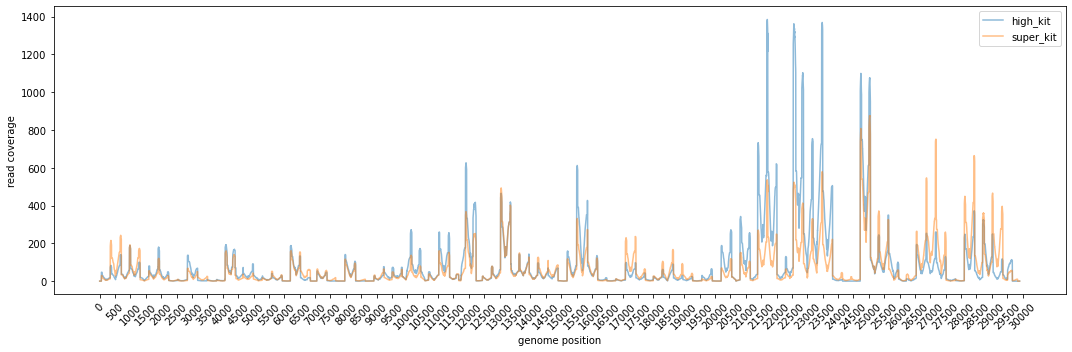

In [20]:
import numpy as np
import pandas as pd, os, matplotlib.pyplot as plt
#fig = plt.figure(figsize=(15, 5))
fig, ax = plt.subplots(figsize=(15, 5))
reps = ['/home/ouso/depth_files_post/high_kit/', '/home/ouso/depth_files_post/super_kit/'] 
count = 0
reads_series = 0
xtick = np.arange(0, 30500, 500)
for rep in reps:
    for file in os.listdir(rep):
        count += 1
        df = pd.read_table(f'{rep}{file}', sep='\t', names=['ref', 'pos', 'no_reads' ])
        label = rep.split('/')[-2]
        reads_series += df['no_reads']
    reads_series_avg = reads_series / count 
    reads_series_avg.plot(logy=False, ax=ax, alpha=0.5, label=label)
plt.xlabel('genome position')
plt.ylabel('read coverage')
plt.xticks(xtick, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
fig.savefig('avg_kit_coverage.png')

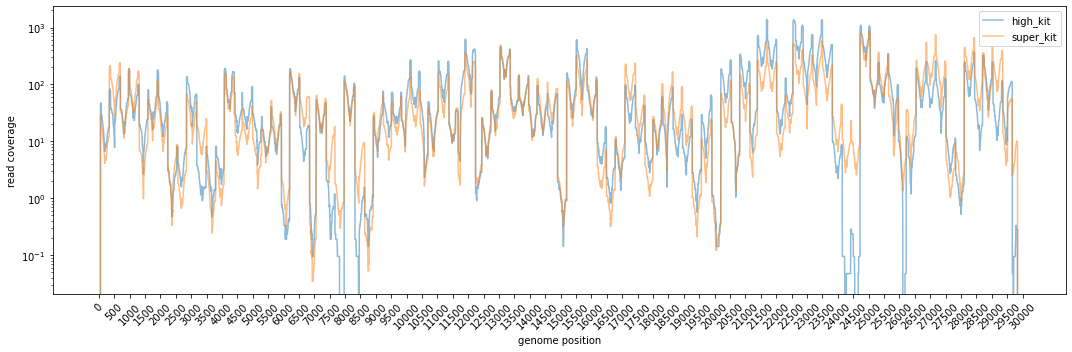

In [21]:
import numpy as np
import pandas as pd, os, matplotlib.pyplot as plt
#fig = plt.figure(figsize=(15, 5))
fig, ax = plt.subplots(figsize=(15, 5))
reps = ['/home/ouso/depth_files_post/high_kit/', '/home/ouso/depth_files_post/super_kit/'] 
count = 0
reads_series = 0
xtick = np.arange(0, 30500, 500)
for rep in reps:
    for file in os.listdir(rep):
        count += 1
        df = pd.read_table(f'{rep}{file}', sep='\t', names=['ref', 'pos', 'no_reads' ])
        label = rep.split('/')[-2]
        reads_series += df['no_reads']
    reads_series_avg = reads_series / count 
    reads_series_avg.plot(logy=True, ax=ax, alpha=0.5, label=label)
plt.xlabel('genome position')
plt.ylabel('read coverage')
plt.xticks(xtick, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
#fig.savefig('/home/ouso/depth_files_post/avg_kit_coverage2.png')

# $7^{th}$ April, 2021

# Primer depths

In [1]:
import pandas as pd
# import primer depths .tsv file
df = pd.read_table('/home/ouso/depth_files/batch2/depth_files_04-04-2021_11:25/COVC21058_S21_primers.dph')

In [2]:
df.head()

,Primer_Name,Read_Count
0,nCoV-2019_1_LEFT,3761
1,nCoV-2019_1_RIGHT,4284
2,nCoV-2019_2_LEFT,10140
3,nCoV-2019_2_RIGHT,9669
4,nCoV-2019_3_LEFT,6867


In [3]:
# define function that returns a df with the average primer depths
def primer_depth(df):
    return (
        df.assign(Primer_Name = df['Primer_Name']
        .apply(lambda x: int(x.split('_')[1])))
        .set_index('Primer_Name')
        .groupby('Primer_Name')
        .mean()
    )


In [4]:
# collate all primer depths for all the samples in a batch
import pandas as pd, os

def primer_depth(df):
    return (
        df.assign(Primer_Name = df['Primer_Name']
        .apply(lambda x: int(x.split('_')[1])))
        .set_index('Primer_Name')
        .groupby('Primer_Name')
        .mean()
    )

suffix = '_primers.dph'
base_dir = '/home/ouso/depth_files/batch2/test'
files = os.listdir(base_dir)
data = []
for file in files:
    if file.endswith(suffix):
        data.append(file)
    else: pass

df2 = pd.DataFrame()
for file in data:
    sample_name = os.path.basename(file).split('_')[0]
    sample_df = primer_depth(pd.read_table(f'{base_dir}/{file}'))
    sample_df2 = sample_df.rename(columns={'Read_Count': sample_name})
    df2 = df2.merge(sample_df2, how='outer', left_index=True, right_index=True)
#df2.to_csv(f'{base_dir}/samples_primer_depths.csv')
     

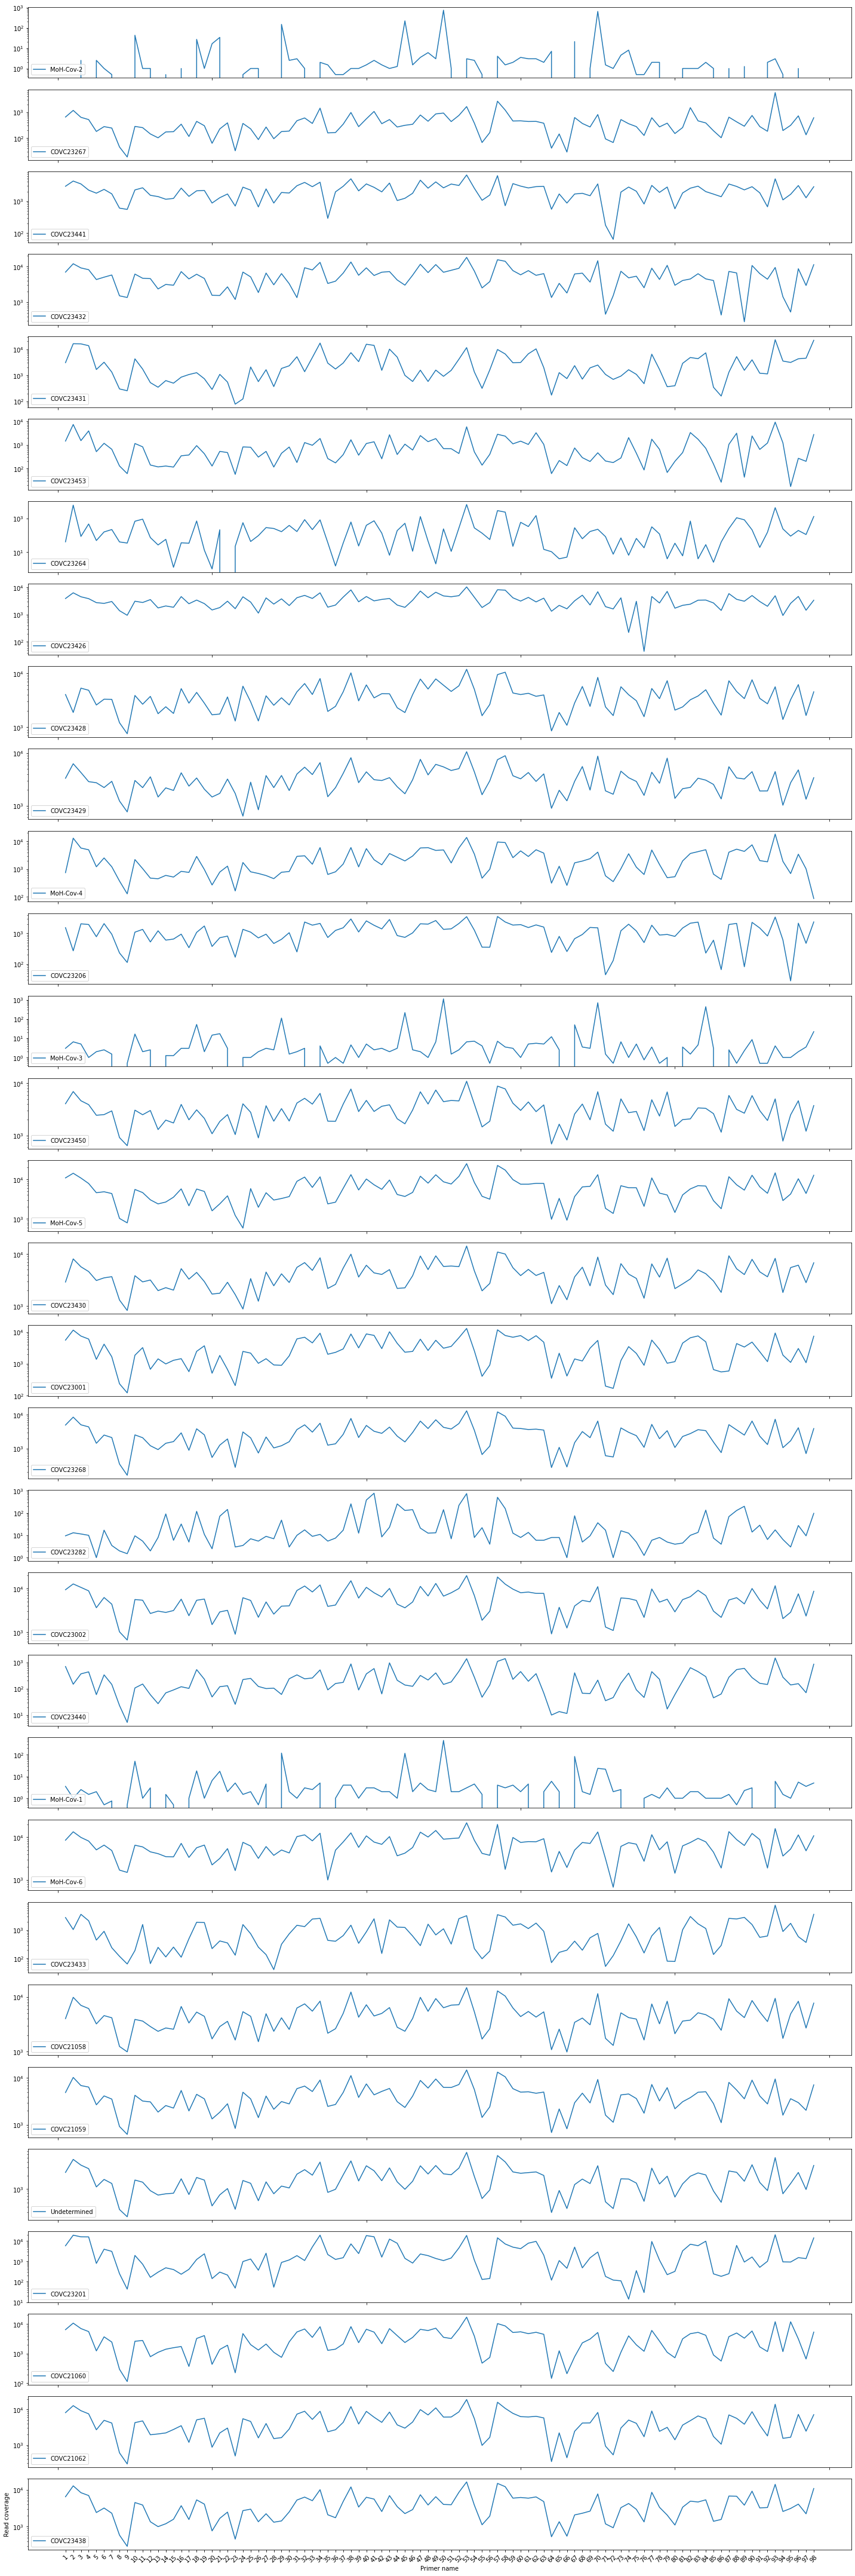

In [26]:
# plot primer depths across samples
import pandas as pd, matplotlib.pyplot as plt, numpy as np, os

def primer_depth(df):
    return (
        df.assign(Primer_Name = df['Primer_Name']
        .apply(lambda x: int(x.split('_')[1])))
        .set_index('Primer_Name')
        .groupby('Primer_Name')
        .mean()
    )

suffix = '_primers.dph'
base_dir = '/home/ouso/depth_files/batch2/depth_files_04-04-2021_11:25'
files = os.listdir(base_dir)
data = []
for file in files:
    if file.endswith(suffix):
        data.append(file)
    else: pass
a = len(data)
b, c = 1, -1
fig, axs = plt.subplots(a, b, figsize=(20,60)) 

xtick = np.arange(1, 99)

for file in data:
    c += 1
    sample_name = file.split('_')[0]
    sample_df = primer_depth(pd.read_table(f'{base_dir}/{file}'))
    sample_df2 = sample_df.rename(columns={'Read_Count': sample_name})
    sample_df2.plot(logy=True, ax=axs[c], sharex=True, sharey=False) 
    axs[c].legend(loc='lower left')
plt.xlabel('Primer name')
plt.ylabel('Read coverage')
plt.xticks(xtick, rotation=45)
plt.tight_layout()
plt.show()
#fig.savesample_df2fig('avg_kit_coverage2.png')


# Read depths

no numeric data to plot for MoH-Cov-1_S1_prm-trm.dph or MoH-Cov-1_S1_msk.dph
no numeric data to plot for MoH-Cov-2_S2_prm-trm.dph or MoH-Cov-2_S2_msk.dph
no numeric data to plot for MoH-Cov-3_S3_prm-trm.dph or MoH-Cov-3_S3_msk.dph


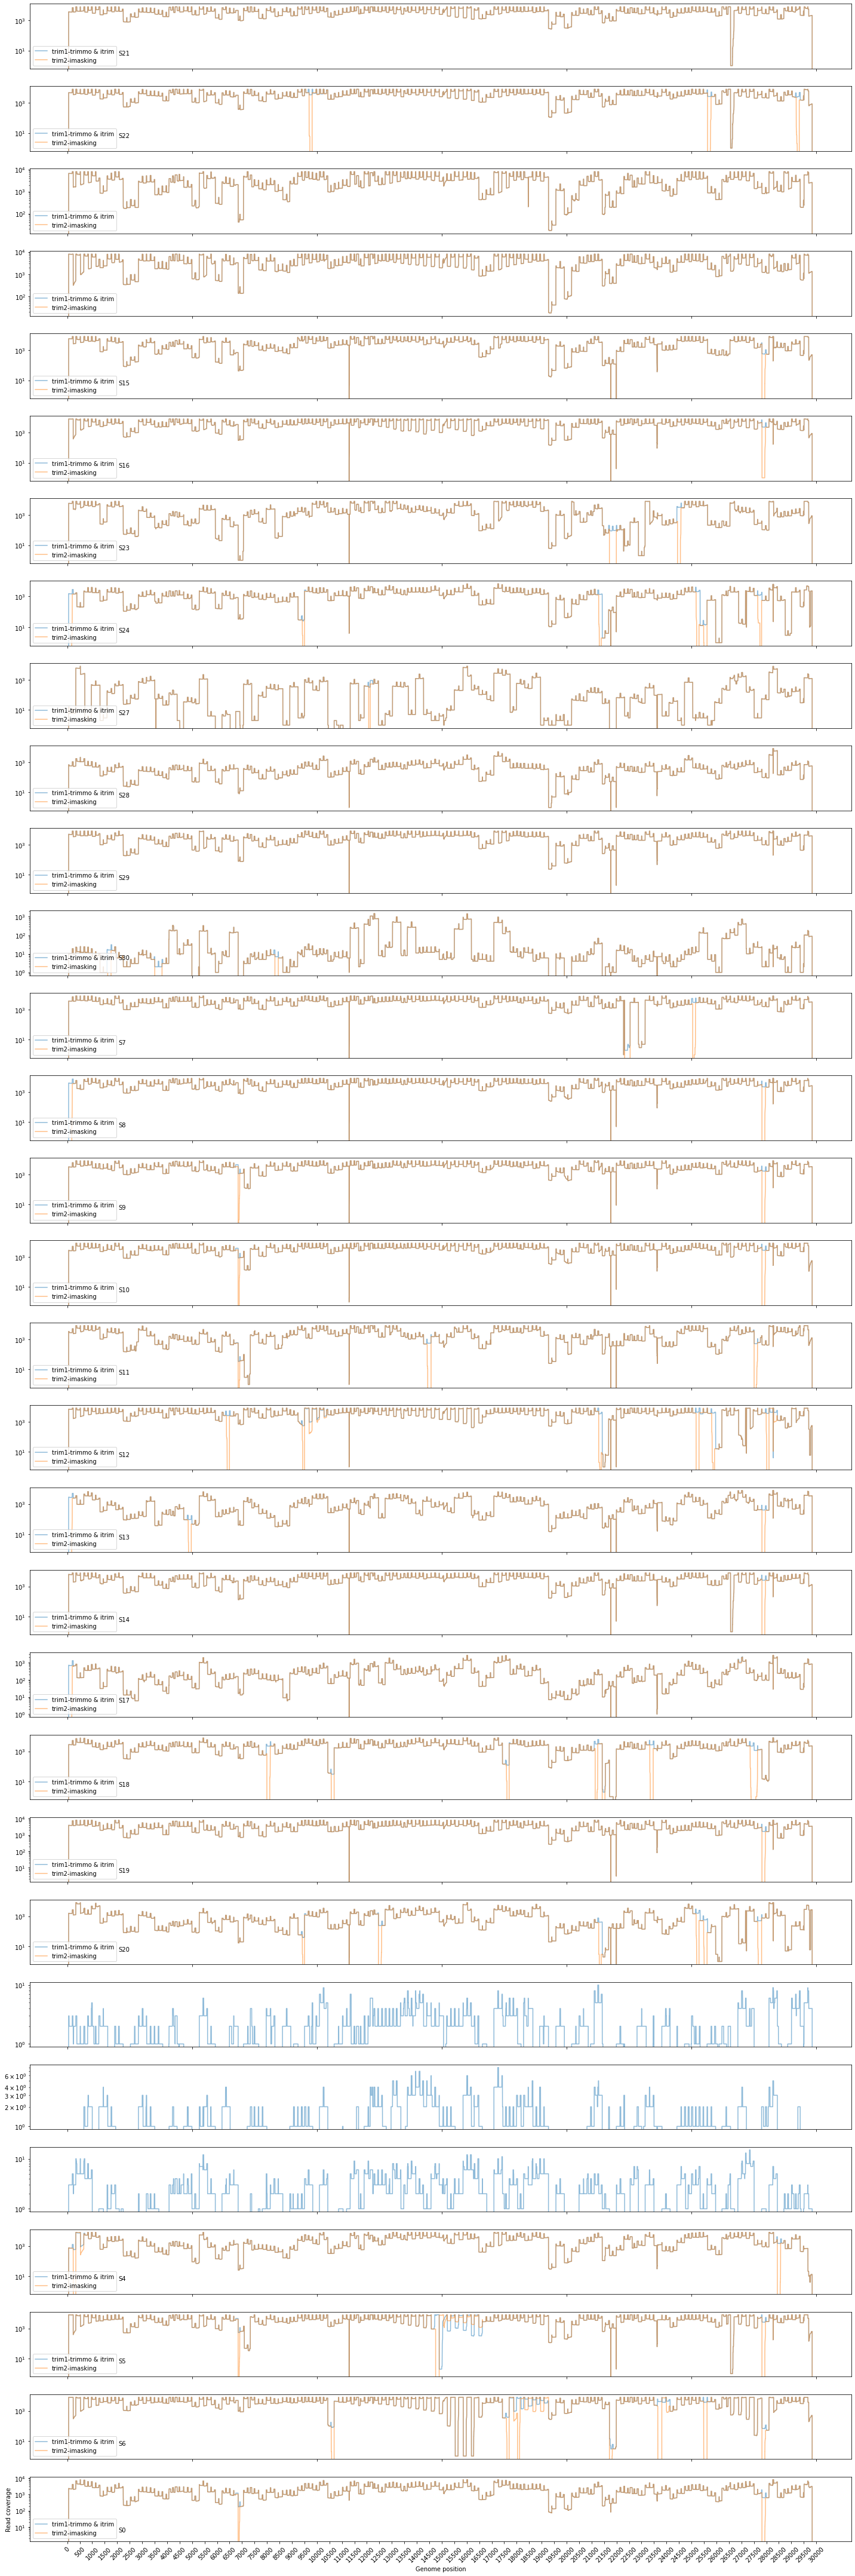

In [5]:
# plot read depths
import pandas as pd, numpy as np, os, matplotlib.pyplot as plt

suffix = '_prm-trm.dph'
suffix2 = '_msk.dph' 
base_dir = '/home/ouso/depth_files/batch2/depth_files_04-04-2021_11:25'
files = os.listdir(base_dir)
data = []
data2 = []
for file in files:
    if file.endswith(suffix):
        data.append(file)
    elif file.endswith(suffix2):
        data2.append(file)
    else: pass
a = len(data)
b, c = 1, -1

fig, axs = plt.subplots(a, b, figsize=(20, 60))

xtick = np.arange(0, 30500, 500)

for trm1, trm2 in zip(sorted(data), sorted(data2)):
    c += 1
    if trm1.split('_')[:1] == trm2.split('_')[:1]: 
        try:
            df1 = pd.read_table(f'{base_dir}/{trm1}', sep='\t', names=['ref', 'pos', 'no_reads' ])
            df2 = pd.read_table(f'{base_dir}/{trm2}', sep='\t', names=['ref', 'pos', 'no_reads' ])
            label1 = 'trim1-trimmo & itrim'
            label2 = 'trim2-imasking'
            df1['no_reads'].plot(logy=True, ax=axs[c], sharex=True, alpha=0.5, label=label1)
            df2['no_reads'].plot(logy=True, ax=axs[c], sharex=True, alpha=0.5, label=label2)
            axs[c].legend(loc='lower left')
            text = trm1.split('_')[1]
            axs[c].annotate(f'{text}', xy=(2050, 5))
            plt.ylabel('Read coverage')
        except TypeError:
                print(f'no numeric data to plot for {trm1} or {trm2}')
        finally: pass
    else: print(f'Samples {trm1} and {trm2} are not mate pairs, they will not be plotted')
plt.xlabel('Genome position')
plt.xticks(xtick, rotation=45)
plt.tight_layout()
plt.show()
#fig.savefig('avg_kit_coverage.png')

# Metadata Processing

In [4]:
# import raw metadata file
import pandas as pd
base_dir = '/home/douso/Insync/D.Ouso@cgiar.org/OneDrive Biz/sequencing_metadata/raw'
file_name = 'Sequencing Samples_Batch 3.xlsx'
df_metadata = pd.read_excel(f'{base_dir}/{file_name}')
df_metadata.head()

,Testing Lab,Case ID,Type of Case,Sample No,Sample name,ID,Age,Age Unit,Gender,Phone No,...,Quarantine facility,Have symptoms,Date of Onset of symptoms,Symptoms shown,Sample Type,Date of Sample Collection,Date Sample Received in the lab,Result,Lab confirmation date,Unnamed: 30
0,ILRI,TIG/COV/1204,Initial,COVC23426,SUSAN WAMBUI,NaN,47.0,Years,F,723400477.0,...,NaN,Yes,2021-02-28 00:00:00,[=],NP Swab,2021-03-02,2021-03-02,Positive,2021-03-02,NaN
1,ILRI,TIG/COV/1206,Initial,COVC23428,DAVID NJUGUNA,NaN,55.0,Years,M,NaN,...,NaN,Yes,2021-02-26 00:00:00,FC;DIB,NP Swab,2021-03-02,2021-03-02,Positive,2021-03-02,NaN
2,ILRI,TIG/COV/1207,Initial,COVC23429,ERICK KARANJA,NaN,57.0,Years,M,NaN,...,NaN,Yes,2021-02-23 00:00:00,CO;DIB,NP Swab,2021-03-02,2021-03-02,Positive,2021-03-02,NaN
3,ILRI,TIG/COV/1208,Initial,COVC23430,LAWRENCE NJUGUNA,NaN,53.0,Years,M,722725768.0,...,NaN,Yes,2021-02-27 00:00:00,CO,NP Swab,2021-03-02,2021-03-02,Positive,2021-03-02,NaN
4,ILRI,KBU/RSC/970,Initial,COVC23431,ERIC KARANJA,28463133,30.0,Years,M,717657790.0,...,NaN,Yes,2021-02-22 00:00:00,FC;CO,NP Swab,2021-02-26,2021-03-02,Positive,2021-03-02,NaN


In [5]:
# define a func to replace spaces in the header names
def tidy_header1(df):
    df.columns = [col.replace(' ', '_') for col in df.columns]
    return df
# define func to drop "unwanted" metadata columns
def drop_cols(df):
    keeps = ['Sample_No', 'Age', 'Age_Unit', 'Gender', 'Occupation'
         , 'Nationality', 'County_of_Residence', 'Has_travel_History'
         , 'Travel_from', 'Quarantine_facility', 'Have_symptoms'
         , 'Date_of_Onset_of_symptoms', 'Symptoms_shown', 'Sample_Type'
         , 'Date_of_Sample_Collection','Date_Sample_Received_in_the_lab', 'Result', 'Lab_confirmation_date' ]
    return df[keeps]

In [6]:
cln_header = tidy_header1(df_metadata)
cln_header

,Testing_Lab,Case_ID,Type_of_Case,Sample_No,Sample_name,ID,Age,Age_Unit,Gender,Phone_No,...,Quarantine_facility,Have_symptoms,Date_of_Onset_of_symptoms,Symptoms_shown,Sample_Type,Date_of_Sample_Collection,Date_Sample_Received_in_the_lab,Result,Lab_confirmation_date,Unnamed:_30
0,ILRI,TIG/COV/1204,Initial,COVC23426,SUSAN WAMBUI,NaN,47.0,Years,F,723400477.0,...,NaN,Yes,2021-02-28 00:00:00,[=],NP Swab,2021-03-02,2021-03-02,Positive,2021-03-02,NaN
1,ILRI,TIG/COV/1206,Initial,COVC23428,DAVID NJUGUNA,NaN,55.0,Years,M,NaN,...,NaN,Yes,2021-02-26 00:00:00,FC;DIB,NP Swab,2021-03-02,2021-03-02,Positive,2021-03-02,NaN
2,ILRI,TIG/COV/1207,Initial,COVC23429,ERICK KARANJA,NaN,57.0,Years,M,NaN,...,NaN,Yes,2021-02-23 00:00:00,CO;DIB,NP Swab,2021-03-02,2021-03-02,Positive,2021-03-02,NaN
3,ILRI,TIG/COV/1208,Initial,COVC23430,LAWRENCE NJUGUNA,NaN,53.0,Years,M,722725768.0,...,NaN,Yes,2021-02-27 00:00:00,CO,NP Swab,2021-03-02,2021-03-02,Positive,2021-03-02,NaN
4,ILRI,KBU/RSC/970,Initial,COVC23431,ERIC KARANJA,28463133,30.0,Years,M,717657790.0,...,NaN,Yes,2021-02-22 00:00:00,FC;CO,NP Swab,2021-02-26,2021-03-02,Positive,2021-03-02,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,ILRI,KBU/RSC/0835,Initial,COVC21039,VINCENT OGANGO,38364726,19.0,Years,M,743505389.0,...,NaN,Yes,NaN,P-C;GW,NP Swab,2020-11-12,2020-11-13,Positive,2020-11-16,NaN
115,ILRI,KBU/RSC/0836,Initial,COVC21040,SHARYZ ACHIENG,36130214,22.0,Years,F,714147102.0,...,NaN,Yes,NaN,P-C;GW,NP Swab,2020-11-12,2020-11-13,Positive,2020-11-16,NaN
116,ILRI,KBU/RSC/0838,Initial,COVC21042,JOHN GITAU,13164426,44.0,Years,M,721594913.0,...,NaN,No,NaN,NaN,NP Swab,2020-11-12,2020-11-13,Positive,2020-11-16,NaN
117,ILRI,KBU/RSC/0842,Initial,COVC21046,MORRIS GACHEE MAINA,28922852,27.0,Years,M,700829478.0,...,NaN,No,NaN,CO,NP Swab,2020-11-12,2020-11-13,Positive,2020-11-16,NaN


In [7]:
sub_metadata = drop_cols(cln_header)

### Retrieve Ct values sheet

In [8]:
# import Ct data from sheet2 of the metadata file
df_metadata2 = pd.read_excel(f'{base_dir}/{file_name}', 'Combined Data', header=1)
df_metadata2.head()

,Well,Well Position,Sample Name,N gene,ORF1ab Gene,Average Ct,Results,Quality,RNA Conc (ng/µl),Assay Name
0,1,A1,23426,16.339579,16.157328,16.248453,Positive,Strong positive,6.66,RNA HS
1,2,A2,23428,20.150341,20.696140,20.423241,Positive,Strong positive,7.94,RNA HS
2,3,A3,23429,13.701305,13.822499,13.761902,Positive,Strong positive,9.20,RNA HS
3,4,A4,23430,19.875237,21.516209,20.695723,Positive,Strong positive,6.06,RNA HS
4,5,A5,23431,22.992088,26.209766,24.600927,Positive,Strong positive,3.26,RNA HS


In [9]:
# define func to retrieve particular columns from a df (spaces in col names must be replaced with _ in the input col_list)
def get_cols(df, col_list):
    new_df = tidy_header1(df)
    return new_df[col_list]

In [10]:
df_cts = get_cols(df_metadata2, ['Sample_Name', 'Average_Ct'])
##############
df_cts = df_cts.assign(Sample_Name = df_cts['Sample_Name'].apply(lambda x: 'COVC' + str(x)))# special case for this batch 
#to correct sample name
##############
df_cts.head()

,Sample_Name,Average_Ct
0,COVC23426,16.248453
1,COVC23428,20.423241
2,COVC23429,13.761902
3,COVC23430,20.695723
4,COVC23431,24.600927


### Merge the `sub_metadata` and `df_cts` data

In [11]:
sub_metadata.head()

,Sample_No,Age,Age_Unit,Gender,Occupation,Nationality,County_of_Residence,Has_travel_History,Travel_from,Quarantine_facility,Have_symptoms,Date_of_Onset_of_symptoms,Symptoms_shown,Sample_Type,Date_of_Sample_Collection,Date_Sample_Received_in_the_lab,Result,Lab_confirmation_date
0,COVC23426,47.0,Years,F,Secretary,Kenya,Kiambu,No,NaN,NaN,Yes,2021-02-28 00:00:00,[=],NP Swab,2021-03-02,2021-03-02,Positive,2021-03-02
1,COVC23428,55.0,Years,M,Business,Kenya,Kiambu,No,NaN,NaN,Yes,2021-02-26 00:00:00,FC;DIB,NP Swab,2021-03-02,2021-03-02,Positive,2021-03-02
2,COVC23429,57.0,Years,M,NaN,Kenya,Kiambu,No,NaN,NaN,Yes,2021-02-23 00:00:00,CO;DIB,NP Swab,2021-03-02,2021-03-02,Positive,2021-03-02
3,COVC23430,53.0,Years,M,Administration,Kenya,Kiambu,No,NaN,NaN,Yes,2021-02-27 00:00:00,CO,NP Swab,2021-03-02,2021-03-02,Positive,2021-03-02
4,COVC23431,30.0,Years,M,HCW,Kenya,Kiambu,No,NaN,NaN,Yes,2021-02-22 00:00:00,FC;CO,NP Swab,2021-02-26,2021-03-02,Positive,2021-03-02


In [12]:
# define function to merge metadata with cts data
def metadata_mrg_cts(sub_metadata, df_cts):
    return (sub_metadata.merge(df_cts, left_on='Sample_No', right_on='Sample_Name')
            .drop('Sample_No', axis=1))

# merge metadata with cts data
merged_metadata = metadata_mrg_cts(sub_metadata, df_cts)
#merged_data.to_excel('/home/ouso/Insync/D.Ouso@cgiar.org/OneDrive Biz/sequencing_metadata/processed/batch3_mrg.xlsx')

In [13]:
merged_metadata.head()

,Age,Age_Unit,Gender,Occupation,Nationality,County_of_Residence,Has_travel_History,Travel_from,Quarantine_facility,Have_symptoms,Date_of_Onset_of_symptoms,Symptoms_shown,Sample_Type,Date_of_Sample_Collection,Date_Sample_Received_in_the_lab,Result,Lab_confirmation_date,Sample_Name,Average_Ct
0,47.0,Years,F,Secretary,Kenya,Kiambu,No,NaN,NaN,Yes,2021-02-28 00:00:00,[=],NP Swab,2021-03-02,2021-03-02,Positive,2021-03-02,COVC23426,16.248453
1,55.0,Years,M,Business,Kenya,Kiambu,No,NaN,NaN,Yes,2021-02-26 00:00:00,FC;DIB,NP Swab,2021-03-02,2021-03-02,Positive,2021-03-02,COVC23428,20.423241
2,57.0,Years,M,NaN,Kenya,Kiambu,No,NaN,NaN,Yes,2021-02-23 00:00:00,CO;DIB,NP Swab,2021-03-02,2021-03-02,Positive,2021-03-02,COVC23429,13.761902
3,53.0,Years,M,Administration,Kenya,Kiambu,No,NaN,NaN,Yes,2021-02-27 00:00:00,CO,NP Swab,2021-03-02,2021-03-02,Positive,2021-03-02,COVC23430,20.695723
4,30.0,Years,M,HCW,Kenya,Kiambu,No,NaN,NaN,Yes,2021-02-22 00:00:00,FC;CO,NP Swab,2021-02-26,2021-03-02,Positive,2021-03-02,COVC23431,24.600927


### Get Pangolin data

In [14]:
import pandas as pd
# import Pangolin lineage data
base_dir_pango = '/home/douso/Analysis/nextclade_files/batch2/nextclade_files_04-04-2021_11:25'
file_name_pango = 'consensus_png.xlsx'

df_pango = pd.read_excel(f'{base_dir_pango}/{file_name_pango}')

# retrieve cols Sequence_name and Lineage (func getget_cols replaces col names spaces with _)
cols = ['Sequence_name', 'Lineage', 'Most_common_countries', 'Date_range']
df_pango_cln = get_cols(df_pango, cols)
df_pango_cln.head()

,Sequence_name,Lineage,Most_common_countries,Date_range
0,COVC21058,B.1,"USA, UK, Spain","January-24, February-11"
1,COVC21059,B.1.596.1,"Kenya, Australia, Finland","October-07, December-01"
2,COVC21060,B.1.549,"Kenya, UK","July-17, December-17"
3,COVC21062,B.1.143,"India, Canada, UK","March-28, October-12"
4,COVC23001,B.1.1.7,"UK, Denmark, France","September-20, February-21"


### Get Variants data

In [19]:
# import variants data
df_var = pd.read_table('/home/douso/Analysis/variant_files/batch2/variant_files_04-04-2021_11:25/per-gene_variant_anns.tsv')

df_var_cln = df_var.assign(sample_name = df_var['sample_name'].apply(lambda x: x.split('_')[0]))

df_var_cln.head()

,sample_name,num_vars,ORF1ab,ORF1a,S,ORF3a,ORF3b,E,M,ORF6,ORF7a,ORF7b,ORF8,N,ORF9a,ORF9b,ORF10
0,COVC23431,38,"S216S, N615N, L766L, F924F, T1001I, A1708D, F1...",NaN,"H69_V70del, Y145del, N501Y, A570D, D614G, P681...",L101F,NaN,NaN,NaN,NaN,NaN,NaN,"Q27*, R52I, K68*, Y73C","D3H, D3V, D3E, R203K, R203R, G204R, S235F",NaN,NaN,NaN
1,COVC23450,39,"S216S, N615N, F924F, T1001I, A1708D, F1907F, I...",NaN,"H69_V70del, Y145del, N501Y, A570D, D614G, P681...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Q27*, R52I, K68*, Y73C","D3H, D3V, D3E, R203K, R203R, G204R, S235F, Y26...",NaN,NaN,NaN
2,COVC23001,40,"S216S, N615N, F924F, T1001I, A1708D, F1907F, I...",NaN,"H69_V70del, Y145del, N501Y, A570D, E583D, D614...",NaN,NaN,NaN,H155Y,NaN,NaN,NaN,"Q27*, R52I, K68*, Y73C","D3H, D3V, D3E, R203K, R203R, G204R, S235F, Q389H",NaN,NaN,NaN
3,COVC23428,36,"R24R, S216S, H374H, F924F, T1001I, A1708D, F19...",NaN,"H69_V70del, Y145del, N501Y, A570D, D614G, P681...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Q27*, R52I, K68*, Y73C","D3H, D3V, D3E, R203K, R203R, G204R, S235F",NaN,NaN,NaN
4,COVC23432,31,"F411F, G514G, K798K, F924F, T2007I, H2092H, V2...",NaN,"Q52R, A67V, H69_V70del, Y145del, E484K, D614G,...",S92L,NaN,L21F,I82T,F2del,NaN,NaN,NaN,"S2_D3delinsY, D3H, A12V, P142P, T205I",NaN,NaN,NaN


In [20]:
df_var_cln.columns

Index(['sample_name', 'num_vars', 'ORF1ab', 'ORF1a', 'S', 'ORF3a', 'ORF3b',
       'E', 'M', 'ORF6', 'ORF7a', 'ORF7b', 'ORF8', 'N', 'ORF9a', 'ORF9b',
       'ORF10'],
      dtype='object')

### Get Nextclade data

In [23]:
# import Nextclade clade data
df_nextc = pd.read_excel('/home/douso/Analysis/nextclade_files/batch2/nextclade_files_04-04-2021_11:25/04-04-2021_11:25_nxtc.xlsx')

# retrieve cols seqName and clade (func get_cols replaces col name spaces with _)
cols = ['seqName', 'clade', 'totalMissing']
df_nxt_cln = get_cols(df_nextc, cols)
coverage = round(100 - (df_nxt_cln['totalMissing'] / 29903) * 100, 1)
df_nxt_cln1 = df_nxt_cln.assign(seqName = df_nxt_cln['seqName'].apply(lambda x: x.split('_')[0]))
df_nxt_fnl = df_nxt_cln1.assign(coverage = coverage).drop('totalMissing', axis=1)
df_nextc_cln = df_nxt_fnl.copy()
df_nextc_cln.head()

,seqName,clade,coverage
0,COVC21058,20C,100.0
1,COVC21059,20C,100.0
2,COVC21060,20A,100.0
3,COVC21062,20C,100.0
4,COVC23001,20I/501Y.V1,100.0


### Merge var-nextc

In [27]:
df_varNxt = (df_var_cln.set_index('sample_name').merge(df_nextc_cln.set_index('seqName'), how='outer', left_index=True, right_index=True)
                 .reset_index().rename(columns={'index': 'sample_name'}))
             
df_varNxt.head()

,sample_name,num_vars,ORF1ab,ORF1a,S,ORF3a,ORF3b,E,M,ORF6,ORF7a,ORF7b,ORF8,N,ORF9a,ORF9b,ORF10,clade,coverage
0,COVC21058,20.0,"E102Q, T265I, F924F, L1627L, K3353R, A3755A, L...",NaN,"D614G, L1200L, Q1201K","Q57H, Y113Y",NaN,NaN,NaN,W27*,NaN,NaN,"A14T, V62L","P13S, A35P, R195K, P207T",NaN,NaN,N25N,20C,100.0
1,COVC21059,17.0,"T265I, F924F, D3196D, L4715L, S5665I, C5900F, ...",NaN,"T73I, T572I, D614G, Q677H","Q57H, G172V",NaN,NaN,NaN,NaN,NaN,NaN,T11I,"R195K, T205I, P365L",NaN,NaN,NaN,20C,100.0
2,COVC21060,13.0,"H417Y, F924F, Q1759H, T3255I, Q3729R, L4715L, ...",NaN,"D614G, R683R",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"A254S, A313A",NaN,NaN,NaN,20A,100.0
3,COVC21062,16.0,"E102Q, T265I, F924F, D1273D, K3353R, L4715L, S...",NaN,"D614G, Q675H",Q57H,NaN,V25V,NaN,NaN,NaN,NaN,NaN,"P13S, A152S, R195K, P207T, P279S",NaN,NaN,NaN,20C,100.0
4,COVC23001,40.0,"S216S, N615N, F924F, T1001I, A1708D, F1907F, I...",NaN,"H69_V70del, Y145del, N501Y, A570D, E583D, D614...",NaN,NaN,NaN,H155Y,NaN,NaN,NaN,"Q27*, R52I, K68*, Y73C","D3H, D3V, D3E, R203K, R203R, G204R, S235F, Q389H",NaN,NaN,NaN,20I/501Y.V1,100.0


### Merge pango and variants-nextclade data

In [30]:
# merge the nextclade data to the pangolin data (prioritise pango - left join)
df_panVnxt = (df_pango_cln.set_index('Sequence_name').merge(df_varNxt.set_index('sample_name'), how='outer', left_index=True, right_index=True)
            .reset_index().rename(columns={'index': 'Sequence_name'}))
df_panVnxt.head()

,Sequence_name,Lineage,Most_common_countries,Date_range,num_vars,ORF1ab,ORF1a,S,ORF3a,ORF3b,...,ORF6,ORF7a,ORF7b,ORF8,N,ORF9a,ORF9b,ORF10,clade,coverage
0,COVC21058,B.1,"USA, UK, Spain","January-24, February-11",20.0,"E102Q, T265I, F924F, L1627L, K3353R, A3755A, L...",NaN,"D614G, L1200L, Q1201K","Q57H, Y113Y",NaN,...,W27*,NaN,NaN,"A14T, V62L","P13S, A35P, R195K, P207T",NaN,NaN,N25N,20C,100.0
1,COVC21059,B.1.596.1,"Kenya, Australia, Finland","October-07, December-01",17.0,"T265I, F924F, D3196D, L4715L, S5665I, C5900F, ...",NaN,"T73I, T572I, D614G, Q677H","Q57H, G172V",NaN,...,NaN,NaN,NaN,T11I,"R195K, T205I, P365L",NaN,NaN,NaN,20C,100.0
2,COVC21060,B.1.549,"Kenya, UK","July-17, December-17",13.0,"H417Y, F924F, Q1759H, T3255I, Q3729R, L4715L, ...",NaN,"D614G, R683R",NaN,NaN,...,NaN,NaN,NaN,NaN,"A254S, A313A",NaN,NaN,NaN,20A,100.0
3,COVC21062,B.1.143,"India, Canada, UK","March-28, October-12",16.0,"E102Q, T265I, F924F, D1273D, K3353R, L4715L, S...",NaN,"D614G, Q675H",Q57H,NaN,...,NaN,NaN,NaN,NaN,"P13S, A152S, R195K, P207T, P279S",NaN,NaN,NaN,20C,100.0
4,COVC23001,B.1.1.7,"UK, Denmark, France","September-20, February-21",40.0,"S216S, N615N, F924F, T1001I, A1708D, F1907F, I...",NaN,"H69_V70del, Y145del, N501Y, A570D, E583D, D614...",NaN,NaN,...,NaN,NaN,NaN,"Q27*, R52I, K68*, Y73C","D3H, D3V, D3E, R203K, R203R, G204R, S235F, Q389H",NaN,NaN,NaN,20I/501Y.V1,100.0


### Merge pango-var-nextc and merged_metadata

In [52]:
df_pvnPmd = (df_panVnxt.set_index('Sequence_name')
                 .merge(merged_metadata.set_index('Sample_Name'), how='left', left_index=True, right_index=True)
                 .reset_index().rename(columns={'index': 'Sequence_name'}))

In [53]:
df_pvnPmd.head()

,Sequence_name,Lineage,Most_common_countries,Date_range,num_vars,ORF1ab,ORF1a,S,ORF3a,ORF3b,...,Quarantine_facility,Have_symptoms,Date_of_Onset_of_symptoms,Symptoms_shown,Sample_Type,Date_of_Sample_Collection,Date_Sample_Received_in_the_lab,Result,Lab_confirmation_date,Average_Ct
0,COVC21058,B.1,"USA, UK, Spain","January-24, February-11",20.0,"E102Q, T265I, F924F, L1627L, K3353R, A3755A, L...",NaN,"D614G, L1200L, Q1201K","Q57H, Y113Y",NaN,...,NaN,Yes,2020-11-07 00:00:00,NaN,NP Swab,2020-11-11,2020-11-13,Positive,2020-11-16,16.488002
1,COVC21059,B.1.596.1,"Kenya, Australia, Finland","October-07, December-01",17.0,"T265I, F924F, D3196D, L4715L, S5665I, C5900F, ...",NaN,"T73I, T572I, D614G, Q677H","Q57H, G172V",NaN,...,NaN,No,NaN,NaN,NP Swab,2020-11-11,2020-11-13,Positive,2020-11-16,21.401298
2,COVC21060,B.1.549,"Kenya, UK","July-17, December-17",13.0,"H417Y, F924F, Q1759H, T3255I, Q3729R, L4715L, ...",NaN,"D614G, R683R",NaN,NaN,...,NaN,No,NaN,NaN,NP Swab,2020-11-11,2020-11-13,Positive,2020-11-16,27.878212
3,COVC21062,B.1.143,"India, Canada, UK","March-28, October-12",16.0,"E102Q, T265I, F924F, D1273D, K3353R, L4715L, S...",NaN,"D614G, Q675H",Q57H,NaN,...,NaN,No,NaN,NaN,NP Swab,2020-11-11,2020-11-13,Positive,2020-11-16,24.958512
4,COVC23001,B.1.1.7,"UK, Denmark, France","September-20, February-21",40.0,"S216S, N615N, F924F, T1001I, A1708D, F1907F, I...",NaN,"H69_V70del, Y145del, N501Y, A570D, E583D, D614...",NaN,NaN,...,NaN,No,NaN,NaN,NP Swab,2021-02-09,2021-02-09,Positive,2021-02-09,25.527099


In [ ]:
#### Re-order df_vnpPmd columns and export

In [54]:
df_pvnPmd.columns

Index(['Sequence_name', 'Lineage', 'Most_common_countries', 'Date_range',
       'num_vars', 'ORF1ab', 'ORF1a', 'S', 'ORF3a', 'ORF3b', 'E', 'M', 'ORF6',
       'ORF7a', 'ORF7b', 'ORF8', 'N', 'ORF9a', 'ORF9b', 'ORF10', 'clade',
       'coverage', 'Age', 'Age_Unit', 'Gender', 'Occupation', 'Nationality',
       'County_of_Residence', 'Has_travel_History', 'Travel_from',
       'Quarantine_facility', 'Have_symptoms', 'Date_of_Onset_of_symptoms',
       'Symptoms_shown', 'Sample_Type', 'Date_of_Sample_Collection',
       'Date_Sample_Received_in_the_lab', 'Result', 'Lab_confirmation_date',
       'Average_Ct'],
      dtype='object')

In [55]:
header = ['Sequence_name', 'Age', 'Age_Unit', 'Gender'
          , 'Occupation', 'Nationality', 'County_of_Residence', 'Has_travel_History'
          , 'Travel_from', 'Quarantine_facility'
          , 'Symptoms_shown','Date_of_Sample_Collection', 'Date_Sample_Received_in_the_lab'
          , 'Result', 'Lab_confirmation_date', 'Average_Ct', 'Lineage', 'Most_common_countries'
          , 'Date_range', 'clade','coverage', 'num_vars', 'S', 'ORF1ab', 'ORF1a'
          , 'ORF3a', 'ORF3b', 'E', 'M', 'ORF6', 'ORF7a', 'ORF7b', 'ORF8', 'N'
          , 'ORF9a', 'ORF9b', 'ORF10']

In [56]:
cols_rename = ['S_NUM', 'AGE', 'AGE_UNIT', 'GEND', 'OCCU', 'NAT', 'COUNT_RES', 'TRAV_HIST',
               'TRAV_FROM', 'QUAR_PLACE', 'SYMPS', 'DT_SAM_COLL', 'DT_SAM_RECEP', 'RESULT', 
               'DT_CONF', 'AVG_Ct', 'LIN', 'M_COMM_C', 'DT_RANG', 'CLADE', 'G_COV', 'N_VAR',
               'S', 'ORF1ab', 'ORF1a', 'ORF3a', 'ORF3b', 'E', 'M', 'ORF6', 'ORF7a', 'ORF7b', 
               'ORF8', 'N', 'ORF9a', 'ORF9b', 'ORF10']

In [57]:
df_pvnPmd_fnl = df_pvnPmd[header]
# df_pvnPmd_fnl.columns = cols_rename
# df_pvnPmd_fnl.to_excel('/home/douso/Insync/D.Ouso@cgiar.org/OneDrive Biz/sequencing_metadata/processed/seq-metadata-SM001.xlsx'
#                      , index=False, na_rep='NA')
df_pvnPmd_fnl.head()

,S_NUM,AGE,AGE_UNIT,GEND,OCCU,NAT,COUNT_RES,TRAV_HIST,TRAV_FROM,QUAR_PLACE,...,E,M,ORF6,ORF7a,ORF7b,ORF8,N,ORF9a,ORF9b,ORF10
0,COVC21058,43.0,Years,M,MLT,Kenya,Kiambu,No,NaN,NaN,...,NaN,NaN,W27*,NaN,NaN,"A14T, V62L","P13S, A35P, R195K, P207T",NaN,NaN,N25N
1,COVC21059,33.0,Years,F,HCW,Kenya,Kiambu,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,T11I,"R195K, T205I, P365L",NaN,NaN,NaN
2,COVC21060,40.0,Years,F,Business,Kenya,Nairobi,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"A254S, A313A",NaN,NaN,NaN
3,COVC21062,58.0,Years,M,Business,Kenya,Kiambu,No,NaN,NaN,...,V25V,NaN,NaN,NaN,NaN,NaN,"P13S, A152S, R195K, P207T, P279S",NaN,NaN,NaN
4,COVC23001,63.0,Years,F,NaN,Kenya,Nairobi,No,NaN,NaN,...,NaN,H155Y,NaN,NaN,NaN,"Q27*, R52I, K68*, Y73C","D3H, D3V, D3E, R203K, R203R, G204R, S235F, Q389H",NaN,NaN,NaN


### Clean complete data

In [48]:
# Date_of_Onset_of_symptoms to datetime
# d1 = (complete_data.assign(Date_of_Onset_of_symptoms=complete_data['Date_of_Onset_of_symptoms']
#                       .map(lambda x: x.to_datetime(format='%d-%m-%Y', errors='ignore', na_action='ignore'))))
# d2 = (d1.assign(Date_of_Onset_of_symptoms=d1['Date_of_Sample_Collection']
#                       .map(lambda x: x.strftime(format='%d-%m-%Y', errors='coerce'), na_action='ignore')))
# d3 = (d2.assign(Date_of_Onset_of_symptoms=d2['Date_Sample_Received_in_the_lab']
#                       .map(lambda x: x.strftime(format='%d-%m-%Y', errors='coerce'), na_action='ignore')))
# d1.info()

### Subsample brief data

In [298]:
cols = ['Sequence_name','Date_of_Sample_Collection', 'Lineage', 'clade', 'County_of_Residence', 
        'Gender', 'Nationality', 'Date_Sample_Received_in_the_lab', 'Lab_confirmation_date']
brief_data = complete_data[cols]
brief_data#.head()

['seq_name','dt_coll', 'lineage', 'clade', 'county', 
        'gender', 'nationality', 'dt_rcvd']

,Sequence_name,Date_of_Sample_Collection,Lineage,clade,County_of_Residence,Gender,Nationality,Date_Sample_Received_in_the_lab
0,COVC21058,2020-11-11,B.1,20C,Kiambu,M,Kenya,2020-11-13
1,COVC21059,2020-11-11,B.1.596.1,20C,Kiambu,F,Kenya,2020-11-13
2,COVC21060,2020-11-11,B.1.549,20A,Nairobi,F,Kenya,2020-11-13
3,COVC21062,2020-11-11,B.1.143,20C,Kiambu,M,Kenya,2020-11-13
4,COVC23001,2021-02-09,B.1.1.7,20I/501Y.V1,Nairobi,F,Kenya,2021-02-09
5,COVC23002,2021-02-09,B.1.1.7,20I/501Y.V1,Nairobi,F,Kenya,2021-02-09
6,COVC23201,2021-02-12,B.1.351,20H/501Y.V2,Kiambu,M,Kenya,2021-02-12
7,COVC23206,2021-02-10,B.1.525,20A,Kiambu,M,Kenya,2021-02-12
8,COVC23264,2021-02-16,B.1,19A,Kiambu,F,Kenya,2021-02-17
9,COVC23267,2021-02-16,B.1.1.7,20I/501Y.V1,Kiambu,F,Kenya,2021-02-17


### Get Variants of Concern data

In [164]:
 # MOH mutations of concern (spike only)
file_name = 'moc_list = ['K417N', 'E484K', 'N501Y', 'D80A', 'A570D']
base_dir = '/home/ouso/variant_files/batch2/variant_files_04-04-2021_11:25'

# define a function to retrieve MoC and all mutations for the s-gene
def get_mut_of_concern(ann_file_name, moc_list):
    import pandas as pd, glob, os

    def intersection(x, y):
        return list(set(x) & set(y))

    moc_list = moc_list
    file_name = ann_file_name

    df = pd.read_excel(f'{base_dir}/{file_name}')
    mutations = []
    moc = []
    sample_id = []
    for row in df.itertuples():
        substitutions = row.annotation.replace(' ', '').split(',')[1:-1]
        if len(moc_list) >= len(intersection(moc_list, substitutions)) > 0:
            intsct = intersection(moc_list, substitutions)
            sample_name = row.sample_name
            mutations.append(str(substitutions).replace("[", "").replace("]", "").replace("'", ""))
            moc.append(str(intsct).replace("[", "").replace("]", "").replace("'", ""))
            sample_id.append(sample_name)
        else: pass 

    return pd.DataFrame({'Sample_ID': sample_id, 'Mut_of_Concern_(S)': moc, 'All_Mutations_(S)': mutations})

In [297]:
moc_data = get_mut_of_concern(file_name, moc_list)
moc_data#.head()

,Sample_ID,Mut_of_Concern_(S),All_Mutations_(S)
0,COVC23431,"A570D, N501Y","Y145del, N501Y, A570D, D614G, P681H, T716I, S982A"
1,COVC23450,"A570D, N501Y","Y145del, N501Y, A570D, D614G, P681H, T716I, S982A"
2,COVC23001,"A570D, N501Y","Y145del, N501Y, A570D, E583D, D614G, P681H, T7..."
3,COVC23428,"A570D, N501Y","Y145del, N501Y, A570D, D614G, P681H, T716I, S982A"
4,COVC23432,E484K,"A67V, H69_V70del, Y145del, E484K, D614G, Q677H..."
5,COVC23429,"A570D, N501Y","Y145del, N501Y, A570D, D614G, P681H, T716I, S982A"
6,COVC23268,"A570D, N501Y","Y145del, N501Y, A570D, D614G, H655Y, P681H, T7..."
7,MoH-Cov-3,"A570D, N501Y","Y145del, N501Y, A570D, D614G, H655Y, P681H, T7..."
8,COVC23206,E484K,"A67V, H69_V70del, Y145del, E484K, D614G, Q677H..."
9,COVC23430,"A570D, N501Y","Y145del, N501Y, A570D, D614G, P681H, T716I, S982A"


### Merge brief_data and moc_data

In [186]:
brief_moc_data_mrg = (brief_data.merge(moc_data, 
                                      how='left', left_on='Sequence_name', right_on='Sample_ID'))
brief_moc_data_mrg = (brief_moc_data_mrg.assign(Date_of_Sample_Collection=brief_moc_data_mrg['Date_of_Sample_Collection']
                                                .map(lambda x: x.strftime(format='%d-%m-%Y') , na_action='ignore'))
                      .loc[brief_moc_data_mrg['Sequence_name'] != 'Undetermined'])# removes "undetermined"
#brief_moc_data_mrg.fillna('NA').to_excel('/home/ouso/Insync/D.Ouso@cgiar.org/OneDrive Biz/sequencing_metadata/processed/batch3_s-gene_ann.xlsx')
brief_moc_data_mrg#.head()


,Sequence_name,Date_of_Sample_Collection,Lineage,clade,County_of_Residence,Gender,Nationality,Date_Sample_Received_in_the_lab,Sample_ID,Mut_of_Concern_(S),All_Mutations_(S)
0,COVC21058,11-11-2020,B.1,20C,Kiambu,M,Kenya,2020-11-13,NaN,NaN,NaN
1,COVC21059,11-11-2020,B.1.596.1,20C,Kiambu,F,Kenya,2020-11-13,NaN,NaN,NaN
2,COVC21060,11-11-2020,B.1.549,20A,Nairobi,F,Kenya,2020-11-13,NaN,NaN,NaN
3,COVC21062,11-11-2020,B.1.143,20C,Kiambu,M,Kenya,2020-11-13,NaN,NaN,NaN
4,COVC23001,09-02-2021,B.1.1.7,20I/501Y.V1,Nairobi,F,Kenya,2021-02-09,COVC23001,"A570D, N501Y","Y145del, N501Y, A570D, E583D, D614G, P681H, T7..."
5,COVC23002,09-02-2021,B.1.1.7,20I/501Y.V1,Nairobi,F,Kenya,2021-02-09,COVC23002,"A570D, N501Y","Y145del, N501Y, A570D, D614G, P681H, T716I, S982A"
6,COVC23201,12-02-2021,B.1.351,20H/501Y.V2,Kiambu,M,Kenya,2021-02-12,COVC23201,K417N,"L242_L244del, K417N, D614G, A701V"
7,COVC23206,10-02-2021,B.1.525,20A,Kiambu,M,Kenya,2021-02-12,COVC23206,E484K,"A67V, H69_V70del, Y145del, E484K, D614G, Q677H..."
8,COVC23264,16-02-2021,B.1,19A,Kiambu,F,Kenya,2021-02-17,NaN,NaN,NaN
9,COVC23267,16-02-2021,B.1.1.7,20I/501Y.V1,Kiambu,F,Kenya,2021-02-17,COVC23267,"A570D, N501Y","Y145del, N501Y, A570D, D614G, H655Y, P681H, T716I"


### Policy brief report

In [323]:
brief_moc_data = (brief_data.merge(moc_data[['Sample_ID', 'Mut_of_Concern_(S)']]
                                   , how='left', left_on='Sequence_name', right_on='Sample_ID'))
y = brief_moc_data.loc[brief_moc_data['Sequence_name'] != 'Undetermined']
x = y.loc[y['Sequence_name'] != 'COVC23264']

df_moc_data = x.drop(['Sequence_name', 'Sample_ID', 'Date_Sample_Received_in_the_lab'], axis=1)
brief_moc_data = (df_moc_data.assign(Date_of_Sample_Collection=df_moc_data['Date_of_Sample_Collection']
                                        .map(lambda x: x.strftime(format='%d-%m-%Y') , na_action='ignore'))
                  .reset_index()
                  .drop('index', axis=1))
brief_moc_data

,Date_of_Sample_Collection,Lineage,clade,County_of_Residence,Gender,Nationality,Mut_of_Concern_(S)
0,11-11-2020,B.1,20C,Kiambu,M,Kenya,NaN
1,11-11-2020,B.1.596.1,20C,Kiambu,F,Kenya,NaN
2,11-11-2020,B.1.549,20A,Nairobi,F,Kenya,NaN
3,11-11-2020,B.1.143,20C,Kiambu,M,Kenya,NaN
4,09-02-2021,B.1.1.7,20I/501Y.V1,Nairobi,F,Kenya,"A570D, N501Y"
5,09-02-2021,B.1.1.7,20I/501Y.V1,Nairobi,F,Kenya,"A570D, N501Y"
6,12-02-2021,B.1.351,20H/501Y.V2,Kiambu,M,Kenya,K417N
7,10-02-2021,B.1.525,20A,Kiambu,M,Kenya,E484K
8,16-02-2021,B.1.1.7,20I/501Y.V1,Kiambu,F,Kenya,"A570D, N501Y"
9,17-02-2021,B.1.1.7,20I/501Y.V1,Nairobi,F,Kenya,"A570D, N501Y"


In [325]:
cols = ['Date of Collection', 'Pango Lineage', 'Next Clade', 'County', 'Gender', 'Nationality', 'MoC-S-Protein']
brief_moc_data.columns = cols
#brief_moc_data.fillna('NA').to_excel('/home/ouso/Insync/D.Ouso@cgiar.org/OneDrive Biz/sequencing_metadata/processed/Policy_Brief-001.xlsx')
brief_moc_data

,Date of Collection,Pango Lineage,Next Clade,County,Gender,Nationality,MoC-S-Protein
0,11-11-2020,B.1,20C,Kiambu,M,Kenya,NaN
1,11-11-2020,B.1.596.1,20C,Kiambu,F,Kenya,NaN
2,11-11-2020,B.1.549,20A,Nairobi,F,Kenya,NaN
3,11-11-2020,B.1.143,20C,Kiambu,M,Kenya,NaN
4,09-02-2021,B.1.1.7,20I/501Y.V1,Nairobi,F,Kenya,"A570D, N501Y"
5,09-02-2021,B.1.1.7,20I/501Y.V1,Nairobi,F,Kenya,"A570D, N501Y"
6,12-02-2021,B.1.351,20H/501Y.V2,Kiambu,M,Kenya,K417N
7,10-02-2021,B.1.525,20A,Kiambu,M,Kenya,E484K
8,16-02-2021,B.1.1.7,20I/501Y.V1,Kiambu,F,Kenya,"A570D, N501Y"
9,17-02-2021,B.1.1.7,20I/501Y.V1,Nairobi,F,Kenya,"A570D, N501Y"


In [314]:
(brief_moc_data['County']
 .value_counts())

Kiambu      16
Nairobi      6
Name: County, dtype: int64

In [285]:
clr = {'orange': '#FFA500', 'green': '#008000', 'blue': '#0000FF'
          , 'brown': '#A52A2A', 'gray': '#808080'
          , 'magenta': '#FF00FF', 'cyan': '#00FFFF', 'red': '#FF0000'
          , 'lime': '#00FF00', 'olive': '#808000'
          , 'teal': '#008080', 'indigo': '#4B0082'}
clr.values()

dict_values(['#FFA500', '#008000', '#0000FF', '#A52A2A', '#808080', '#FF00FF', '#00FFFF', '#FF0000', '#00FF00', '#808000', '#008080', '#4B0082'])

In [ ]:
clrs = pd.read_html('https://www.rapidtables.com/web/css/css-color.html')
clrs

In [327]:
(brief_moc_data['Pango Lineage']
 .value_counts().index)

Index(['B.1.1.7', 'B.1.525', 'B.1.351', 'B.1.549', 'A.23.1', 'B.1.596.1',
       'B.1', 'B.1.530', 'A.23', 'B.1.143'],
      dtype='object')

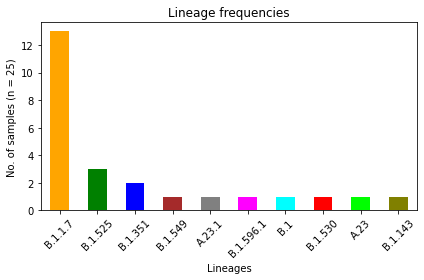

In [328]:
# plot lineage frequencies
colors = ['orange', 'green', 'blue', 'brown', 'grey'
          , 'magenta', 'cyan', 'red', 'lime', 'olive'
          , 'teal', 'indigo']
n = brief_moc_data['Pango Lineage'].count()
fig, ax = plt.subplots()
(brief_moc_data['Pango Lineage']
 .value_counts()
 .plot(kind='bar', ax=ax, color=colors))
plt.title('Lineage frequencies')
plt.xlabel('Lineages')
plt.xticks(rotation=45)
plt.ylabel(f'No. of samples (n = {n})')
plt.tight_layout()
#fig.savefig('/home/ouso/Insync/D.Ouso@cgiar.org/OneDrive Biz/sequencing_metadata/processed/Brief-001.png', dpi=300.0)
plt.show()

In [317]:
brief_moc_data = (brief_data.merge(moc_data[['Sample_ID', 'Mut_of_Concern_(S)']]
                                   , how='inner', left_on='Sequence_name', right_on='Sample_ID'))
y = brief_moc_data.loc[brief_moc_data['Sequence_name'] != 'Undetermined']
x = y.loc[y['Sequence_name'] != 'COVC23264']

df_moc_data = x.drop(['Sequence_name', 'Sample_ID', 'Date_Sample_Received_in_the_lab'], axis=1)
brief_moc_data = (df_moc_data.assign(Date_of_Sample_Collection=df_moc_data['Date_of_Sample_Collection']
                                        .map(lambda x: x.strftime(format='%d-%m-%Y') , na_action='ignore'))
                  .reset_index()
                  .drop('index', axis=1))
brief_moc_data

,Date_of_Sample_Collection,Lineage,clade,County_of_Residence,Gender,Nationality,Mut_of_Concern_(S)
0,09-02-2021,B.1.1.7,20I/501Y.V1,Nairobi,F,Kenya,"A570D, N501Y"
1,09-02-2021,B.1.1.7,20I/501Y.V1,Nairobi,F,Kenya,"A570D, N501Y"
2,12-02-2021,B.1.351,20H/501Y.V2,Kiambu,M,Kenya,K417N
3,10-02-2021,B.1.525,20A,Kiambu,M,Kenya,E484K
4,16-02-2021,B.1.1.7,20I/501Y.V1,Kiambu,F,Kenya,"A570D, N501Y"
5,17-02-2021,B.1.1.7,20I/501Y.V1,Nairobi,F,Kenya,"A570D, N501Y"
6,02-03-2021,B.1.351,20H/501Y.V2,Kiambu,F,Kenya,"D80A, K417N"
7,02-03-2021,B.1.1.7,20I/501Y.V1,Kiambu,M,Kenya,"A570D, N501Y"
8,02-03-2021,B.1.1.7,20I/501Y.V1,Kiambu,M,Kenya,"A570D, N501Y"
9,02-03-2021,B.1.1.7,20I/501Y.V1,Kiambu,M,Kenya,"A570D, N501Y"


### MoC policy brief report

In [321]:
cols = ['Date of Collection', 'Pango Lineage', 'Next Clade', 'County', 'Gender', 'Nationality', 'MoC-S-Protein']
brief_moc_data.columns = cols
#brief_moc_data.fillna('NA').to_excel('/home/ouso/Insync/D.Ouso@cgiar.org/OneDrive Biz/sequencing_metadata/processed/Policy_Brief-001.xlsx')
brief_moc_data


,Date of Collection,Pango Lineage,Next Clade,County,Gender,Nationality,MoC-S-Protein
0,09-02-2021,B.1.1.7,20I/501Y.V1,Nairobi,F,Kenya,"A570D, N501Y"
1,09-02-2021,B.1.1.7,20I/501Y.V1,Nairobi,F,Kenya,"A570D, N501Y"
2,12-02-2021,B.1.351,20H/501Y.V2,Kiambu,M,Kenya,K417N
3,10-02-2021,B.1.525,20A,Kiambu,M,Kenya,E484K
4,16-02-2021,B.1.1.7,20I/501Y.V1,Kiambu,F,Kenya,"A570D, N501Y"
5,17-02-2021,B.1.1.7,20I/501Y.V1,Nairobi,F,Kenya,"A570D, N501Y"
6,02-03-2021,B.1.351,20H/501Y.V2,Kiambu,F,Kenya,"D80A, K417N"
7,02-03-2021,B.1.1.7,20I/501Y.V1,Kiambu,M,Kenya,"A570D, N501Y"
8,02-03-2021,B.1.1.7,20I/501Y.V1,Kiambu,M,Kenya,"A570D, N501Y"
9,02-03-2021,B.1.1.7,20I/501Y.V1,Kiambu,M,Kenya,"A570D, N501Y"


### Plot lineages MoC only

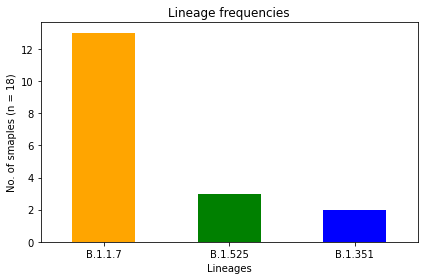

In [322]:
# plot lineage frequencies
n = brief_moc_data['Pango Lineage'].count()
fig, ax = plt.subplots()
brief_moc_data['Pango Lineage'].value_counts().plot(kind='bar', ax=ax, color=['orange', 'green', 'blue', 'brown'])
plt.title('Lineage frequencies')
plt.xlabel('Lineages')
plt.xticks(rotation=0)
plt.ylabel(f'No. of smaples (n = {n})')
plt.tight_layout()
#fig.savefig('/home/ouso/Insync/D.Ouso@cgiar.org/OneDrive Biz/sequencing_metadata/processed/Brief-001.png', dpi=300.0)
plt.show()


In [ ]:
### Sars-CoV-2 Meeting 26th April, 2020

 - Work on detailing my notebook better
 - Investigate sequence insert sizes _vis a vis_ Library preparation procedure
 - Ascertain amplicon-coverage for <80% coverage across 
 - Ct vs number of reads
 - Find missing metadata, find dates
 - Share merged-metadata with Sonal